In [1]:
import random
import torch
import numpy as np
from sklearn.datasets import load_diabetes
# X y y ya son arrays de numpy
X, y = load_diabetes(return_X_y=True)

m = X.shape[0]
unos = np.ones((m, 1))
X = np.append(unos, X, axis=1)

X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)
print(X.shape, y.shape)

torch.Size([442, 11]) torch.Size([442])


In [6]:
y[:10]

tensor([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310.])

In [2]:
n = 20
# learning rate
alpha = torch.tensor(0.001, dtype=torch.float32)
# weights matrix
theta = torch.rand((X.shape[1], 1), dtype=torch.float32, requires_grad=True)
print(theta, theta.shape)
cost_history = []

tensor([[0.6393],
        [0.7706],
        [0.5550],
        [0.5088],
        [0.2063],
        [0.0211],
        [0.1496],
        [0.2393],
        [0.3284],
        [0.6406],
        [0.8408]], requires_grad=True) torch.Size([11, 1])


In [3]:
# entrenamiento usando torch autograd
for i in range(n):
    #forward pass
    # regresion lineal
    z = torch.matmul(X, theta)
    # costo
    # (1/(2*m))*np.sum(np.square(hyp(x, w, b) - y))
    J = (1/(2 * m)) * torch.sum(torch.square(z - y))
    cost_history.append(J.item())
    # print(i, J)
    # backward pass
    # compute gradients
    J.backward()
    # print(f'dtheta: {dtheta}')
    with torch.no_grad():
        theta -= alpha * theta.grad 
    # reset gradients
    theta.grad.zero_()

print('terminado')
print(f'costo inicial: {cost_history[0]}\ncosto final: {cost_history[-1]}')

terminado
costo inicial: 6382563.5
costo final: 1310507.25


In [4]:
cost_history

[6382563.5,
 2889763.25,
 1802231.0,
 1463612.5,
 1358179.0,
 1325350.75,
 1315129.25,
 1311946.5,
 1310955.5,
 1310646.875,
 1310550.875,
 1310521.0,
 1310511.75,
 1310508.625,
 1310507.625,
 1310507.5,
 1310507.5,
 1310507.375,
 1310507.375,
 1310507.25]

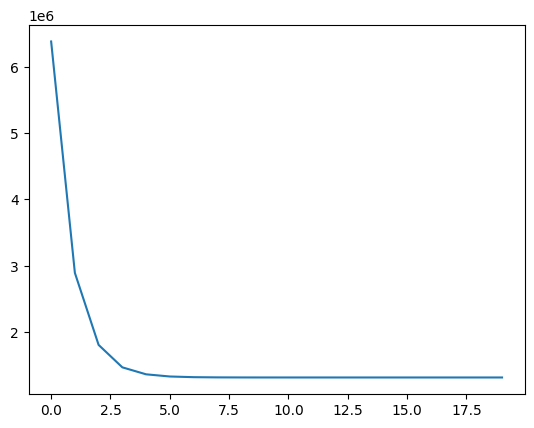

In [5]:
import matplotlib.pyplot as plt
it = list(range(n))
plt.plot(it, cost_history)
plt.show()